# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | linxia
Processing Record 4 of Set 1 | te anau
Processing Record 5 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 1 | sassandra
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | clyde river
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | cidreira
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | lakes entrance
Processing Record 13 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | trofors
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | victoria
Processing Record 20 of Set 1 | dunkirk
Processing Record 21 of Set 1 | kha

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,upernavik,72.7868,-56.1549,-26.95,100,100,2.51,GL,1677480289
1,linxia,35.6003,103.2064,4.68,61,100,3.45,CN,1677480290
2,te anau,-45.4167,167.7167,18.81,65,15,1.35,NZ,1677480290
3,sassandra,4.9500,-6.0833,24.03,91,98,2.58,CI,1677480292
4,barrow,71.2906,-156.7887,-24.99,77,100,8.75,US,1677480240


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,upernavik,72.7868,-56.1549,-26.95,100,100,2.51,GL,1677480289
1,linxia,35.6003,103.2064,4.68,61,100,3.45,CN,1677480290
2,te anau,-45.4167,167.7167,18.81,65,15,1.35,NZ,1677480290
3,sassandra,4.9500,-6.0833,24.03,91,98,2.58,CI,1677480292
4,barrow,71.2906,-156.7887,-24.99,77,100,8.75,US,1677480240


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

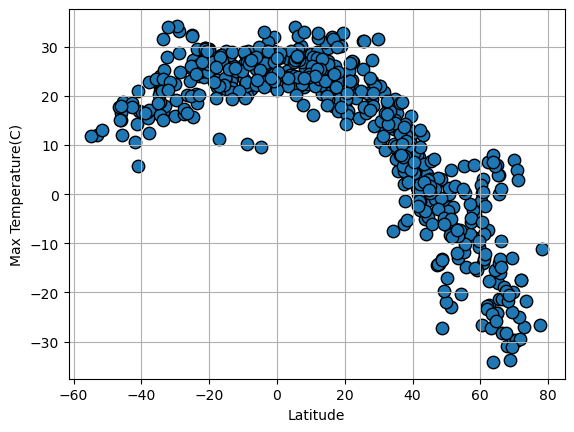

<Figure size 1000x800 with 0 Axes>

In [18]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black', s=80)
plt.title= ('City Max Latitude vs. Temperature (2022-10-18)')
plt.ylabel('Max Temperature(C)')
plt.xlabel('Latitude')
plt.grid()
plt.figure(figsize=(10,8))
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

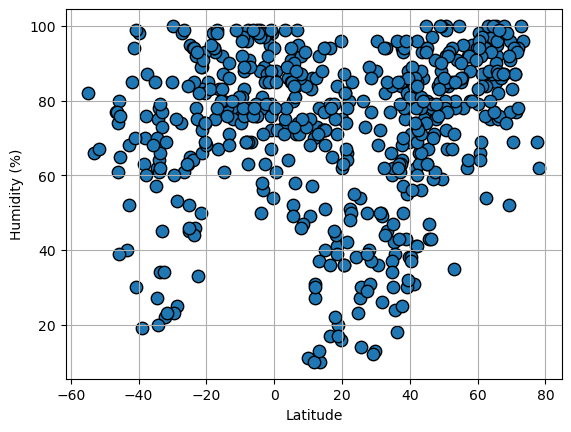

<Figure size 1000x800 with 0 Axes>

In [19]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']


# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black', s=80)
plt.title= ('City Max Latitude vs. Humidity (2022-10-18)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()
plt.figure(figsize=(10,8))
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

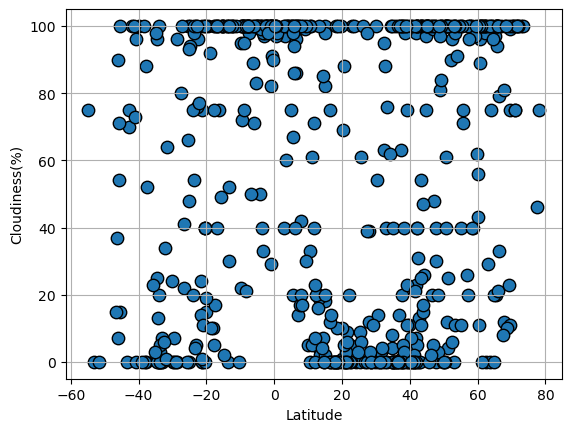

<Figure size 1000x800 with 0 Axes>

In [20]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']


# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black', s=80)
plt.title= ('City Max Latitude vs. Cloudiness (2022-10-18)')
plt.ylabel('Cloudiness(%)')
plt.xlabel('Latitude')
plt.grid()
plt.figure(figsize=(10,8))
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

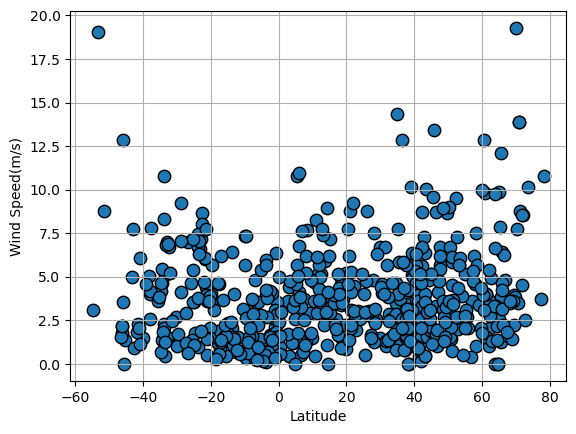

<Figure size 1000x800 with 0 Axes>

In [17]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']


# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black', s=80)
plt.title= ("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel('Wind Speed(m/s)')
plt.xlabel('Latitude')
plt.grid()
plt.figure(figsize=(10,8))

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def linearReg(x_values, y_values, x_p,y_p):
    (slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_equation = "y =" + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    plt.figure(figsize=(10,8))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_equation, xy=(x_p,y_p), fontsize=20, color="red")
    print(f'The r-value is: {rvalue}')

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,upernavik,72.7868,-56.1549,-26.95,100,100,2.51,GL,1677480289
1,linxia,35.6003,103.2064,4.68,61,100,3.45,CN,1677480290
3,sassandra,4.9500,-6.0833,24.03,91,98,2.58,CI,1677480292
4,barrow,71.2906,-156.7887,-24.99,77,100,8.75,US,1677480240
5,clyde river,70.4692,-68.5914,-29.87,69,100,7.72,CA,1677480294


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,te anau,-45.4167,167.7167,18.81,65,15,1.35,NZ,1677480290
6,bredasdorp,-34.5322,20.0403,21.90,62,25,4.66,ZA,1677480294
7,cidreira,-30.1811,-50.2056,22.47,85,24,2.67,BR,1677480295
8,atuona,-9.8000,-139.0333,26.57,75,22,7.33,PF,1677480296
9,lakes entrance,-37.8811,147.9810,22.87,76,0,3.99,AU,1677480297


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8878554858178095


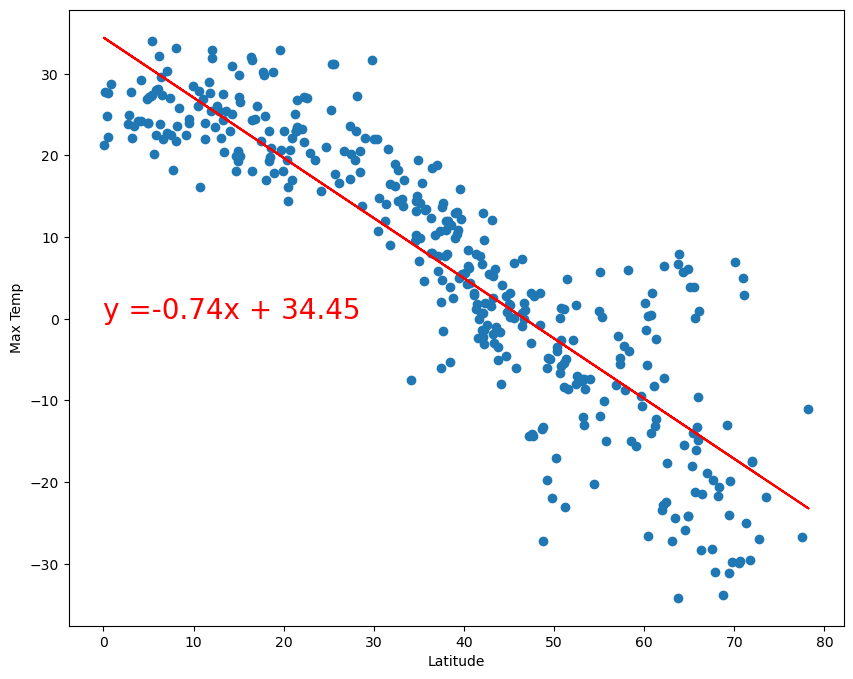

In [24]:
# Linear regression on Northern Hemisphere
linearReg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],0,0)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r-value is: 0.4922669564781374


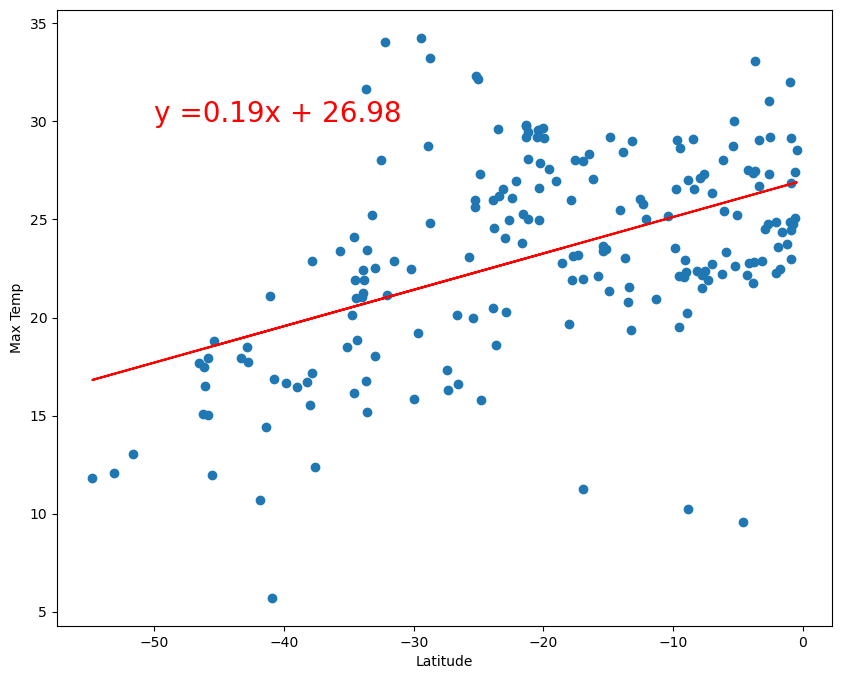

In [25]:
# Linear regression on Southern Hemisphere
linearReg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],-50,30)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Relationship between Temperature and latitude is being reflected by linear regression plot in the above diagram. Despite of limited information, 
given by the value of correlation coefficient, we can still suggest that there is strong negative relation between temperature and latitude in northern hemisphere
while there seem to be very weak relation between temperature and latitude in southern hemisphere.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.32380972005294184


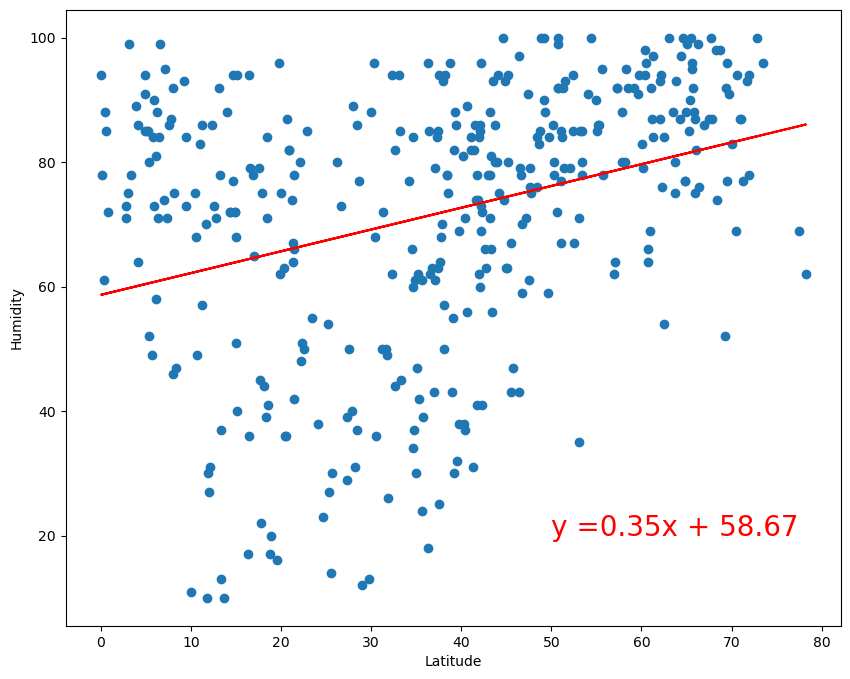

In [26]:
# Northern Hemisphere
linearReg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],50,20)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is: 0.3839620294344653


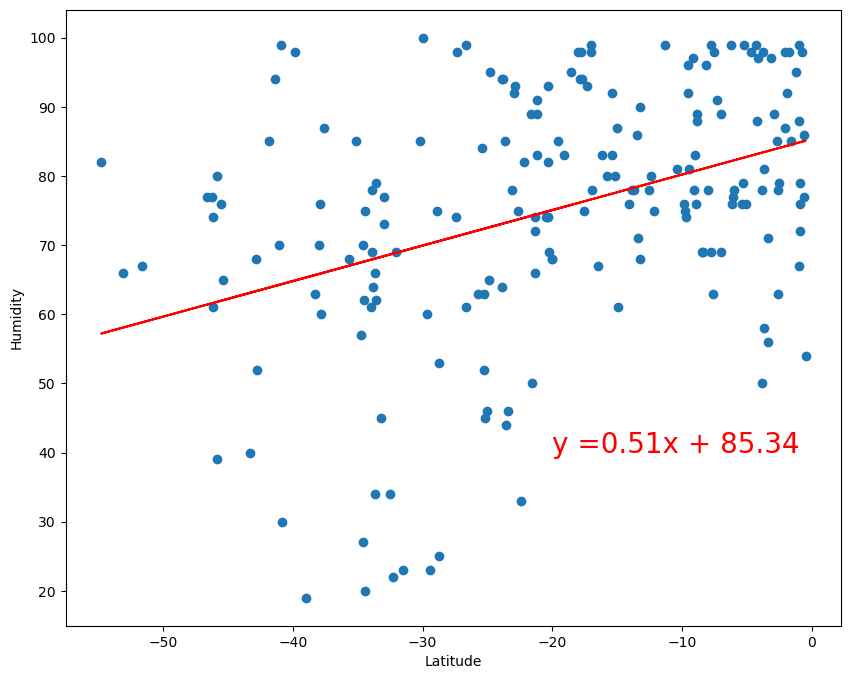

In [27]:
# Southern Hemisphere
linearReg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], -20, 40)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

From looking at r-values in the above data, we can conclude that there is a very weak relationship between latitude and humidity on both hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.19361840113784012


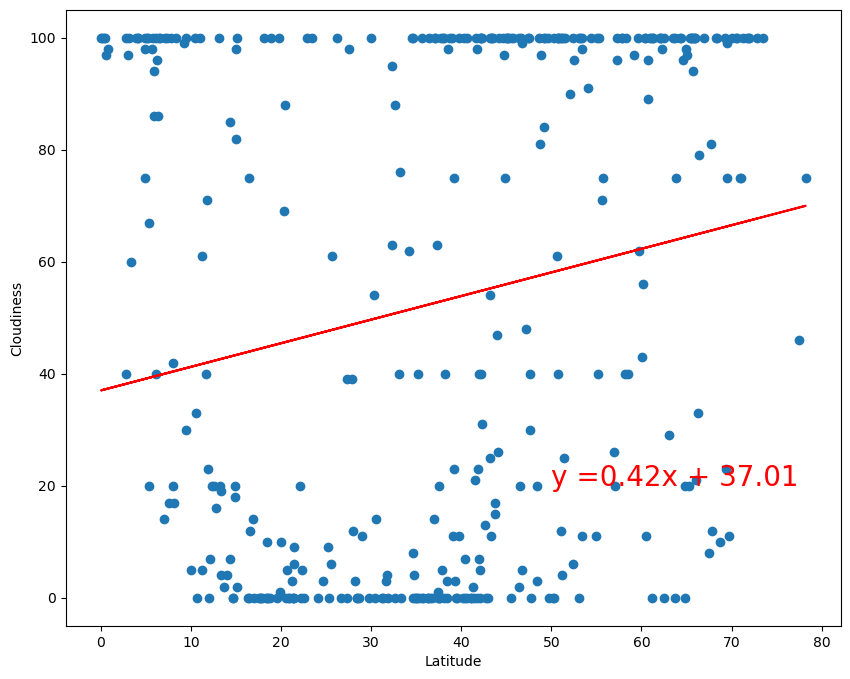

In [28]:
# Northern Hemisphere
linearReg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 50,20)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.4849387924143589


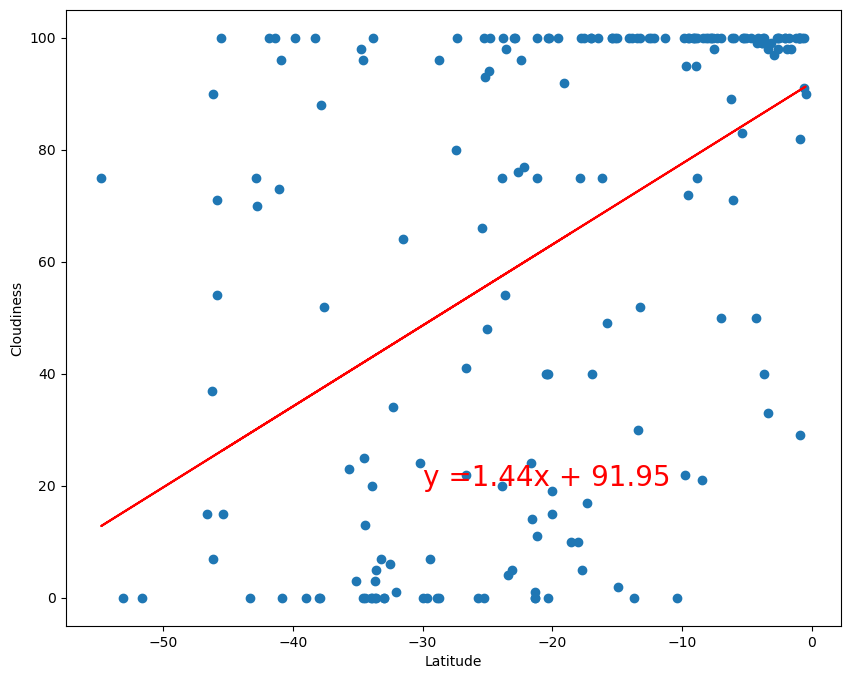

In [29]:
# Southern Hemisphere
linearReg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],-30,20)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

From the analysis of given data, we are able to generate the r-values for cloudiness and latitude. Since, the coefficient of corelation is very low,
it is very easy to conclude that there is very weak relationship between those variables.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.13199378855433327


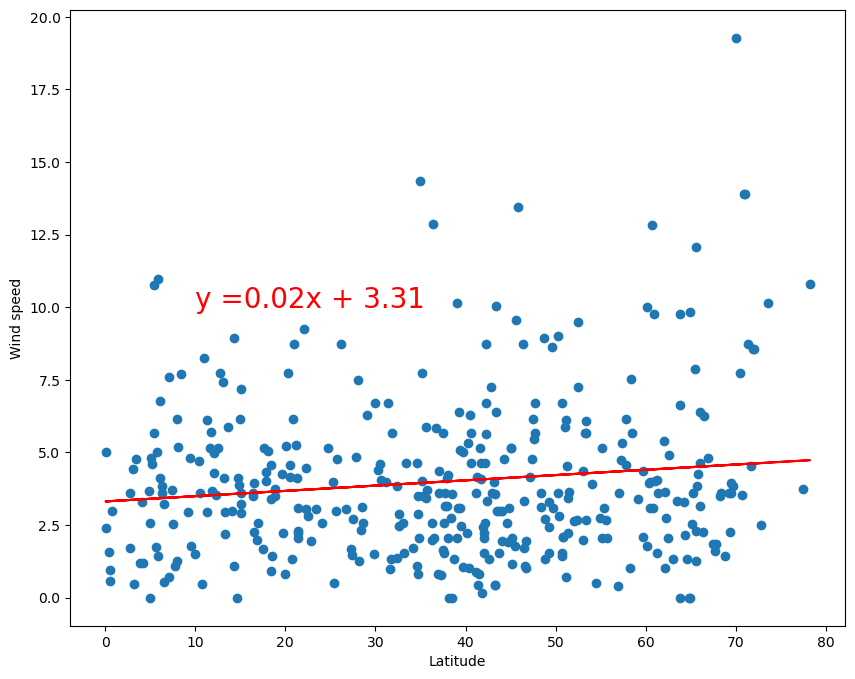

In [31]:
# Northern Hemisphere
linearReg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],10,10)
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.show()

The r-value is: -0.3302346955655235


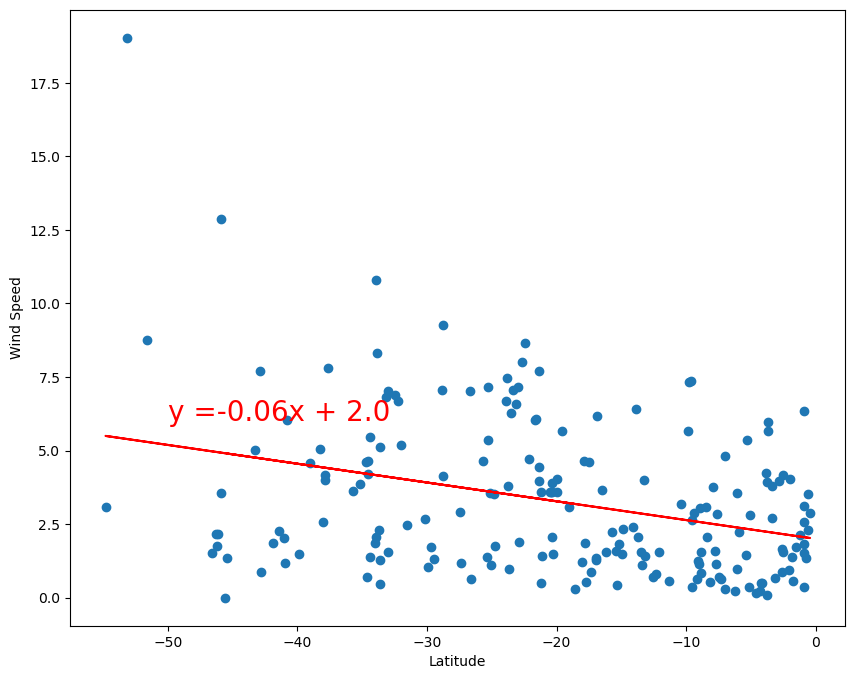

In [32]:
# Southern Hemisphere
linearReg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],-50,6)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The above figures explain about the coorelation of wind speed with latitude in northern and southern hemisphere.
Taking into consideration on r-value, it is clear that there is very weak relationship between two variables.